In [3]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Function to display images
def display_image(image, title="Image"):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


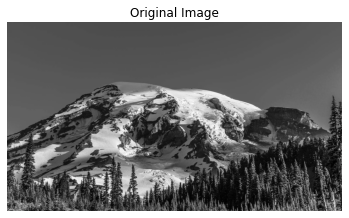

In [5]:
# Loading and displaying the image
original_image = cv2.imread('../IMAGES/Rainier.bmp', cv2.IMREAD_GRAYSCALE)
display_image(original_image, title="Original Image")


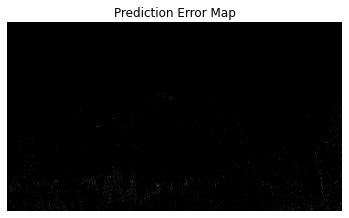

In [6]:
# Median Prediction and Prediction Error Map Generation
def median_prediction(image):
    M, N = image.shape
    prediction = np.zeros_like(image)
    error_map = np.zeros_like(image, dtype=np.uint8)

    for i in range(1, M):
        for j in range(1, N):
            neighbors = [image[i-1, j], image[i, j-1], image[i-1, j-1]]
            prediction[i, j] = np.median(neighbors)
            error_map[i, j] = 0 if abs(int(image[i, j]) - int(prediction[i, j])) <= 127 else 1

    return prediction, error_map

predicted_image, prediction_error_map = median_prediction(original_image)
display_image(prediction_error_map * 255, title="Prediction Error Map")


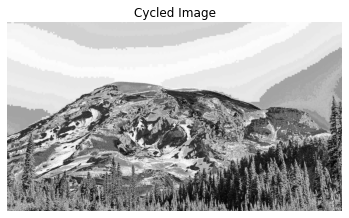

In [7]:
# Bit Plane Cycling-XOR
def bit_plane_cycling_xor(image):
    bit_planes = [(image >> i) & 1 for i in range(8)]
    cycled_bit_planes = [bit_planes[0]]

    for k in range(1, 8):
        cycled_bit_planes.append(bit_planes[k] ^ bit_planes[k-1])

    cycled_image = np.zeros_like(image)
    for k in range(8):
        cycled_image |= (cycled_bit_planes[k] << k)

    return cycled_image

cycled_image = bit_plane_cycling_xor(original_image)
display_image(cycled_image, title="Cycled Image")


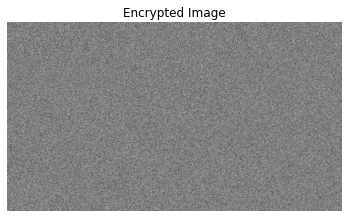

In [8]:
# Image Encryption
def image_encryption(image, key):
    np.random.seed(key)
    encrypted_image = image.copy()
    random_sequence = np.random.randint(0, 256, image.shape, dtype=np.uint8)
    encrypted_image ^= random_sequence
    return encrypted_image

encryption_key = 12345  # Replace with your encryption key
encrypted_image = image_encryption(cycled_image, encryption_key)
display_image(encrypted_image, title="Encrypted Image")


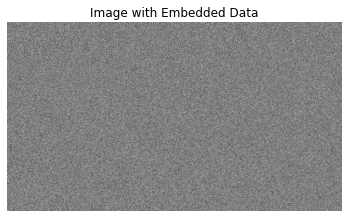

In [9]:
# Data Embedding
def data_embedding(encrypted_image, data, key):
    np.random.seed(key)
    data_length = len(data)
    flat_image = encrypted_image.flatten()
    random_indices = np.random.choice(len(flat_image), data_length, replace=False)
    flat_image[random_indices] = (flat_image[random_indices] & 0xFE) | data
    embedded_image = flat_image.reshape(encrypted_image.shape)
    return embedded_image

# Example secret data
secret_data = np.random.randint(0, 2, encrypted_image.size // 8, dtype=np.uint8)
hiding_key = 54321  # Replace with your hiding key
embedded_image = data_embedding(encrypted_image, secret_data, hiding_key)
display_image(embedded_image, title="Image with Embedded Data")


In [10]:
# Data Extraction and Image Recovery
def data_extraction(embedded_image, key, data_length):
    np.random.seed(key)
    flat_image = embedded_image.flatten()
    random_indices = np.random.choice(len(flat_image), data_length, replace=False)
    extracted_data = flat_image[random_indices] & 1
    return extracted_data



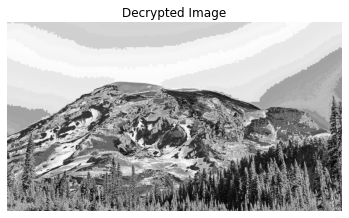

In [11]:
def image_decryption(encrypted_image, key):
    return image_encryption(encrypted_image, key)  # Encryption and decryption are symmetric

extracted_data = data_extraction(embedded_image, hiding_key, len(secret_data))
decrypted_image = image_decryption(embedded_image, encryption_key)
display_image(decrypted_image, title="Decrypted Image")


In [12]:
# Inverse Bit Plane Cycling-XOR
def inverse_bit_plane_cycling_xor(image):
    bit_planes = [(image >> i) & 1 for i in range(8)]
    original_bit_planes = [bit_planes[0]]

    for k in range(1, 8):
        original_bit_planes.append(bit_planes[k] ^ original_bit_planes[k-1])

    original_image = np.zeros_like(image)
    for k in range(8):
        original_image |= (original_bit_planes[k] << k)

    return original_image


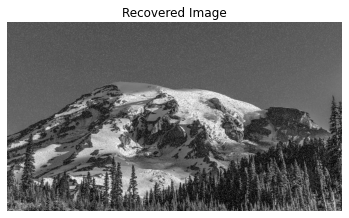

In [13]:
recovered_image = inverse_bit_plane_cycling_xor(decrypted_image)
display_image(recovered_image, title="Recovered Image")   